In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
confirmed = pd.read_csv("covid-data/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("covid-data/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("covid-data/time_series_covid19_recovered_global.csv")


In [7]:
# Kolonları kontrol et
print(confirmed.columns[:5])  # Province/State, Country/Region, Lat, Long, date columns...

# Ülke bazında grupla ve tarihleri topla
confirmed_grouped = confirmed.drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").sum()
deaths_grouped = deaths.drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").sum()
recovered_grouped = recovered.drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").sum()


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20'], dtype='object')


groupby("Country/Region"): Ülke adına göre gruplar.

.sum(): O ülkeye ait eyaletlerin (varsa) toplamını alır.

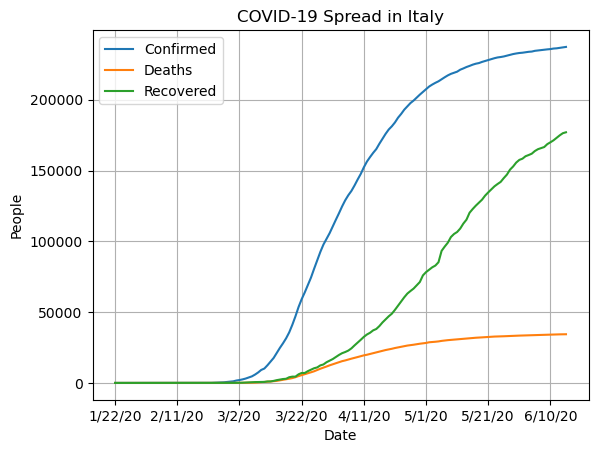

In [8]:
def plot_country_cases(country):
    confirmed_grouped.T[country].plot(label="Confirmed")
    deaths_grouped.T[country].plot(label="Deaths")
    recovered_grouped.T[country].plot(label="Recovered")
    plt.title(f"COVID-19 Spread in {country}")
    plt.xlabel("Date")
    plt.ylabel("People")
    plt.legend()
    plt.grid()
    plt.show()

plot_country_cases("Italy")


.T ile DataFrame'i transpose (çevirdik), çünkü tarih kolonları sütundaydı, onları satır yapmak istedik.

Bu grafik, seçilen ülke için zamanla vaka, ölüm ve iyileşme artışını gösterir.

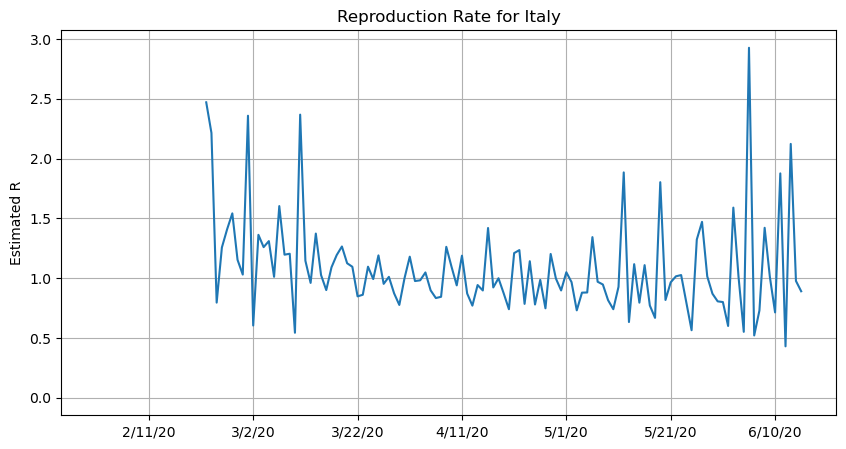

In [9]:
def plot_reproduction_rate(country):
    cases = confirmed_grouped.T[country]
    new_cases = cases.diff()
    reproduction_rate = new_cases / new_cases.shift(1)
    
    plt.figure(figsize=(10,5))
    reproduction_rate.plot()
    plt.title(f"Reproduction Rate for {country}")
    plt.ylabel("Estimated R")
    plt.grid()
    plt.show()

plot_reproduction_rate("Italy")


.diff() ile günlük yeni vaka sayısını bulduk.

reproduction_rate = new_cases / new_cases.shift(1): Bugünkü vaka / dünkü vaka → tahmini yayılma oranı.

Bu oranla hastalığın ne kadar hızlı yayıldığını görebiliriz.

             Deaths  Recovered
Deaths     1.000000   0.815125
Recovered  0.815125   1.000000


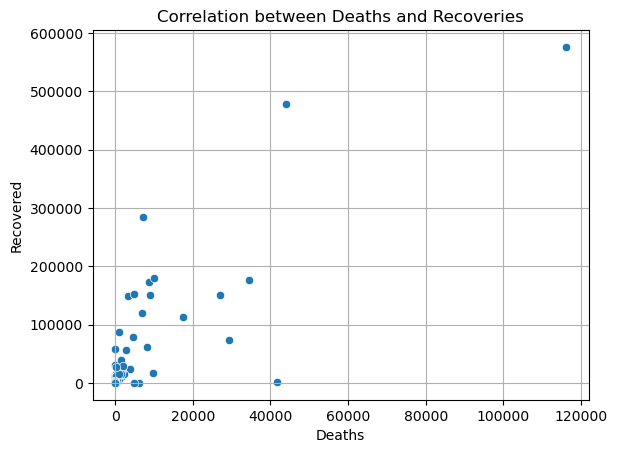

In [10]:
# En son tarihteki toplamlar
latest_deaths = deaths_grouped.iloc[:, -1]
latest_recovered = recovered_grouped.iloc[:, -1]

# DataFrame oluştur
df_corr = pd.DataFrame({
    "Deaths": latest_deaths,
    "Recovered": latest_recovered
})

# Korelasyon
print(df_corr.corr())

# Görselleştirme
sns.scatterplot(x="Deaths", y="Recovered", data=df_corr)
plt.title("Correlation between Deaths and Recoveries")
plt.grid()
plt.show()


.iloc[:, -1]: Son sütunu yani en güncel tarihi alır.

df.corr(): İki sütun arasındaki ilişki katsayısını bulur (−1 < r < 1).

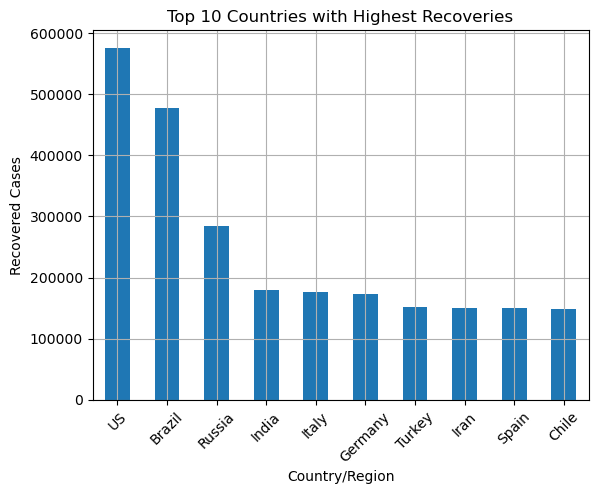

In [11]:
top_recovered = latest_recovered.sort_values(ascending=False).head(10)

top_recovered.plot(kind="bar")
plt.title("Top 10 Countries with Highest Recoveries")
plt.ylabel("Recovered Cases")
plt.xticks(rotation=45)
plt.grid()
plt.show()


.sort_values(): En çok iyileşeni en üste getirir.

kind="bar": Bar grafik ile ülkeleri karşılaştırıyoruz.

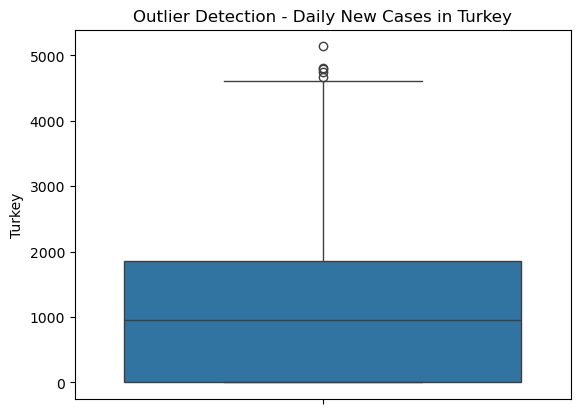

Series([], Name: Turkey, dtype: float64)


In [12]:
# Türkiye için günlük yeni vakalar
new_cases_tr = confirmed_grouped.T["Turkey"].diff()

# Boxplot ile uç değerleri gör
sns.boxplot(new_cases_tr)
plt.title("Outlier Detection - Daily New Cases in Turkey")
plt.show()

# Aykırı günleri yazdır (örneğin ortalamadan çok yüksek olanlar)
threshold = new_cases_tr.mean() + 3 * new_cases_tr.std()
outliers = new_cases_tr[new_cases_tr > threshold]
print(outliers)


.diff(): Günlük vaka artışı

threshold = ort + 3σ: İstatistikte sık kullanılan aykırı değer eşiği

.query("new_cases > @threshold"): Pandas'ta SQL benzeri filtreleme yapar.